# Data Preprocessing and feature engineering-Phase 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#!pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

#### I have taken two datasets from kaggle. One is *india_census_housing-hlpca-full.csv* and the other is *titanic.csv*

In [2]:
def load_india_census():
    data1 = pd.read_csv("india_census_housing-hlpca-full.csv")
    return data1

df1 = load_india_census()
print(df1.shape)

def load():
    data2 = pd.read_csv("titanic.csv")
    return data2
df2 = load()
print(df2.shape)

(1908, 156)
(891, 12)


#### Displaying the first 5 data for the two dataframes :

In [3]:
df1.head()

,State Code,State Name,District Code,District Name,Tehsil Code,Tehsil Name,Town Code/Village code,Ward No,Area Name,Rural/Urban,...,Contition_T_Total,Contition_T_Good,Contition_T_Livable,Contition_T_Dilapidated,Contition_R_Total,Residence_Good,Residence_Livable,Residence_Dilapidated,Residence_cum_other,Residence_cum_Good
0,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Rural,...,100,33.6,58.1,8.3,90.9,32.7,51.0,7.2,9.1,1.0
1,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Total,...,100,34.8,57.3,7.9,91.0,33.8,50.2,6.9,9.0,0.9
2,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Urban,...,100,45.7,49.5,4.8,91.8,45.0,42.2,4.5,8.2,0.7
3,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Rural,...,100,49.7,46.3,3.9,97.2,49.0,44.5,3.7,2.8,0.7
4,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Total,...,100,51.6,44.7,3.8,97.3,50.8,43.0,3.5,2.7,0.8


In [4]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Creating boxplot for the two dataframes to find out outliers present in the dataframes:

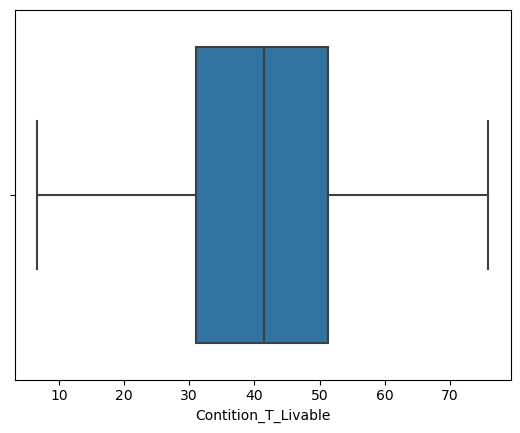

In [5]:
sns.boxplot(x=df1["Contition_T_Livable"])
plt.show()

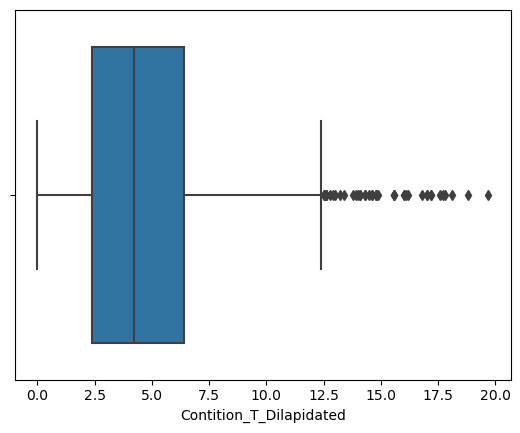

In [6]:
sns.boxplot(x=df1["Contition_T_Dilapidated"])
plt.show()

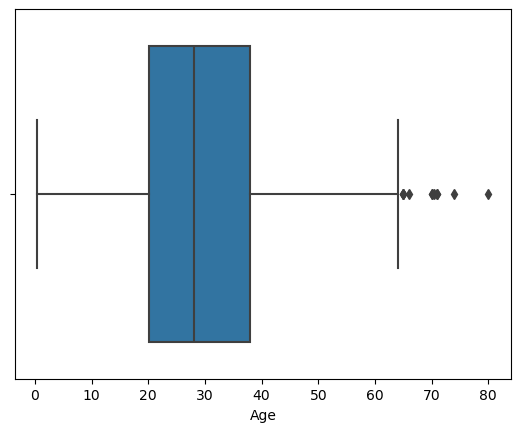

In [7]:
sns.boxplot(x=df2["Age"])
plt.show()

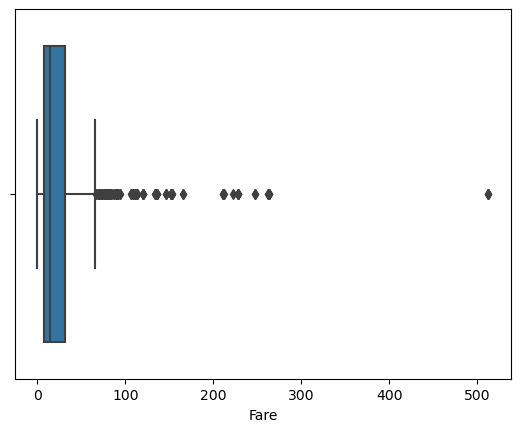

In [8]:
sns.boxplot(x=df2["Fare"])
plt.show()

#### In the above plots, we can see the outliers but not their values. So to know their values, we will define the following function:

In [9]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [10]:
print(outlier_thresholds(df1, "Contition_T_Livable"))

(0.625, 81.625)


In [11]:
print(outlier_thresholds(df2, "Age"))

(-6.6875, 64.8125)


In [12]:
low, up = outlier_thresholds(df2, "Fare")
print(df2[(df2["Fare"] < low) | (df2["Fare"] > up)].head())

    PassengerId  Survived  Pclass  \
1             2         1       1   
27           28         0       1   
31           32         1       1   
34           35         0       1   
52           53         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                     Fortune, Mr. Charles Alexander    male  19.0      3   
31     Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
34                            Meyer, Mr. Edgar Joseph    male  28.0      1   
52           Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   

    Parch    Ticket      Fare        Cabin Embarked  
1       0  PC 17599   71.2833          C85        C  
27      2     19950  263.0000  C23 C25 C27        S  
31      0  PC 17569  146.5208          B78        C  
34      0  PC 17604   82.1708          NaN        C  
52      0  PC 17572   76.7292         

#### Function that check if there is any outliers

In [13]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [14]:
print(check_outlier(df1, "Contition_T_Livable"))
print(check_outlier(df1, "Contition_T_Dilapidated"))

False
True


In [15]:
print(check_outlier(df2, "Age"))
print(check_outlier(df2, "Fare"))

True
True


#### We will grab categorical columns, categorical but cardinal columns and #numerical column to check outliers present. 

In [16]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

In [17]:
cat_cols, num_cols, cat_but_car = grab_col_names(df1)
num_cols = [col for col in num_cols if col not in "State Code"]
print(num_cols)

for col in num_cols:
    print(col, check_outlier(df1, col))

Observations: 1908
Variables: 156
cat_cols: 8
num_cols: 144
cat_but_car: 4
num_but_cat: 7
['District Code', 'Total Number of Good', 'Total Number of Livable', 'Total Number of Dilapidated', 'Total Number of Residence households', 'Total Number of Residence Good', 'Total Number of Residence Livable', 'Total Number of Residence Dilapidated', 'Total Number of Residence cum other', 'Number of Residence cum Good', 'Residence_cum_Livable', 'Residence_cum_Dilapidated', 'Material_Roof_GTBW', 'Material_Roof_PP', 'Material_Roof_HMT', 'Material_Roof_MMT', 'Material_Roof_BB', 'Material_Roof_SS', 'Material_Roof_GMAS', 'Material_Roof_Concrete', 'Material_Roof_AOM', 'Material_Roof_GTB', 'Material_Roof_PP1', 'Material_Roof_MUB', 'Material_Roof_Wood', 'Material_Wall_SNPWM', 'Material_Wall_SPWM', 'Material_Wall_GIMAS', 'Material_Wall_Bb', 'Material_Wall_Concrete', 'Material_Wall_AOM', 'Material_Floor_Mud', 'Material_Floor_WB', 'Material_Floor_BB', 'Material_Floor_Stone', 'Material_Floor_Cement', 'Materi

In [18]:
cat_cols, num_cols, cat_but_car = grab_col_names(df2)
num_cols = [col for col in num_cols if col not in "PassengerId"]
print(num_cols)

for col in num_cols:
    print(col, check_outlier(df2, col))

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
['Age', 'Fare']
Age True
Fare True


#### We can either eliminate the outliers, or modify them by setting threshold values. Changing outliers using a threshold value is usually preferable since removing an outlier and its row also removes all other columns in that row.

In [19]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [20]:
df1 = load_india_census()

cat_cols, num_cols, cat_but_car = grab_col_names(df1)
num_cols.remove('District Code')

for col in num_cols:
    print(col, check_outlier(df1, col))

for col in num_cols:
    replace_with_thresholds(df1, col) 

for col in num_cols:
    print(col, check_outlier(df1, col))

Observations: 1908
Variables: 156
cat_cols: 8
num_cols: 144
cat_but_car: 4
num_but_cat: 7
State Code False
Total Number of Good False
Total Number of Livable False
Total Number of Dilapidated True
Total Number of Residence households True
Total Number of Residence Good False
Total Number of Residence Livable False
Total Number of Residence Dilapidated True
Total Number of Residence cum other True
Number of Residence cum Good True
Residence_cum_Livable True
Residence_cum_Dilapidated True
Material_Roof_GTBW True
Material_Roof_PP True
Material_Roof_HMT True
Material_Roof_MMT True
Material_Roof_BB True
Material_Roof_SS True
Material_Roof_GMAS True
Material_Roof_Concrete False
Material_Roof_AOM True
Material_Roof_GTB True
Material_Roof_PP1 True
Material_Roof_MUB True
Material_Roof_Wood True
Material_Wall_SNPWM True
Material_Wall_SPWM True
Material_Wall_GIMAS True
Material_Wall_Bb False
Material_Wall_Concrete True
Material_Wall_AOM True
Material_Floor_Mud False
Material_Floor_WB True
Materia

C:\Users\Saurav\AppData\Local\Temp\ipykernel_22720\130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-13.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


State Code False
Total Number of Good False
Total Number of Livable False
Total Number of Dilapidated False
Total Number of Residence households False
Total Number of Residence Good False
Total Number of Residence Livable False
Total Number of Residence Dilapidated False
Total Number of Residence cum other False
Number of Residence cum Good False
Residence_cum_Livable False
Residence_cum_Dilapidated False
Material_Roof_GTBW False
Material_Roof_PP False
Material_Roof_HMT False
Material_Roof_MMT False
Material_Roof_BB False
Material_Roof_SS False
Material_Roof_GMAS False
Material_Roof_Concrete False
Material_Roof_AOM False
Material_Roof_GTB False
Material_Roof_PP1 False
Material_Roof_MUB False
Material_Roof_Wood False
Material_Wall_SNPWM False
Material_Wall_SPWM False
Material_Wall_GIMAS False
Material_Wall_Bb False
Material_Wall_Concrete False
Material_Wall_AOM False
Material_Floor_Mud False
Material_Floor_WB False
Material_Floor_BB False
Material_Floor_Stone False
Material_Floor_Cement

In [21]:
df2 = load()

cat_cols, num_cols, cat_but_car = grab_col_names(df2)
num_cols.remove('PassengerId')

for col in num_cols:
    print(col, check_outlier(df2, col))

for col in num_cols:
    replace_with_thresholds(df2, col) 

for col in num_cols:
    print(col, check_outlier(df2, col))

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
Age True
Fare True
Age False
Fare False


#### A score called the Local Outlier Factor (LOF) indicates the likelihood that a given data point is an abnormality or outlier. Our goal is to convert each row to a corresponding score and establish a threshold based on these values. It's excellent if our scores are really near to 1 or -1.

In [22]:
df1 = df1.select_dtypes(include=['float64', 'int64'])
df1 = df1.dropna()
print(df1.shape)
print(df1.head())

(1908, 151)
   State Code  District Code  Tehsil Code  Town Code/Village code  Ward No  \
0         1.0              1            0                       0        0   
1         1.0              1            0                       0        0   
2         1.0              1            0                       0        0   
3         1.0              2            0                       0        0   
4         1.0              2            0                       0        0   

   Total Number of households  Total Number of Good  Total Number of Livable  \
0                         100                  33.6                     58.1   
1                         100                  34.8                     57.3   
2                         100                  45.7                     49.5   
3                         100                  49.7                     46.3   
4                         100                  51.6                     44.7   

   Total Number of Dilapidated  Total 

In [23]:
for col in df1.columns:
    print(col, check_outlier(df1, col))

State Code False
District Code False
Tehsil Code False
Town Code/Village code False
Ward No False
Total Number of households False
Total Number of Good False
Total Number of Livable False
Total Number of Dilapidated False
Total Number of Residence households False
Total Number of Residence Good False
Total Number of Residence Livable False
Total Number of Residence Dilapidated False
Total Number of Residence cum other False
Number of Residence cum Good False
Residence_cum_Livable False
Residence_cum_Dilapidated False
Material_Roof_GTBW False
Material_Roof_PP False
Material_Roof_HMT False
Material_Roof_MMT False
Material_Roof_BB False
Material_Roof_SS False
Material_Roof_GMAS False
Material_Roof_Concrete False
Material_Roof_AOM False
Material_Roof_GTB False
Material_Roof_PP1 False
Material_Roof_MUB False
Material_Roof_Wood False
Material_Wall_SNPWM False
Material_Wall_SPWM False
Material_Wall_GIMAS False
Material_Wall_Bb False
Material_Wall_Concrete False
Material_Wall_AOM False
Materia

In [24]:
low, up = outlier_thresholds(df1, "Total Number of Livable")
print(df1[((df1["Total Number of Livable"] < low) | (df1["Total Number of Livable"] > up))].shape)

(0, 151)


In [25]:
low, up = outlier_thresholds(df1, "Total Number of Dilapidated")
print(df1[((df1["Total Number of Dilapidated"] < low) | (df1["Total Number of Dilapidated"] > up))].shape)

(0, 151)


In [26]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df1)
df1_scores = clf.negative_outlier_factor_
print(df1_scores)

[-1.06885733 -1.04128463 -0.99169011 ... -1.41749232 -1.50722601
 -1.58590236]


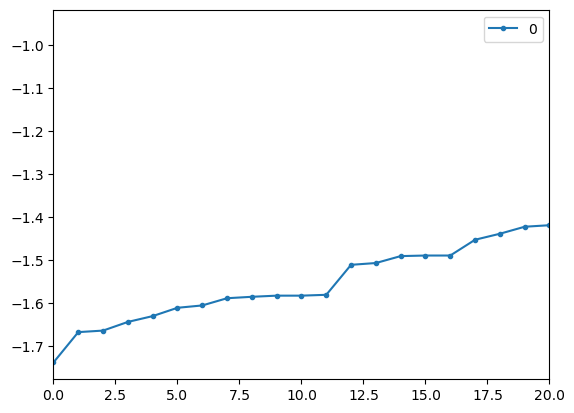

In [27]:
scores = pd.DataFrame(np.sort(df1_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show()

In [28]:
df2 = df2.select_dtypes(include=['float64', 'int64'])
df2 = df2.dropna()
print(df2.shape)
print(df2.head())

(714, 7)
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  65.6344
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500


In [29]:
for col in df2.columns:
    print(col, check_outlier(df2, col))

PassengerId False
Survived False
Pclass False
Age False
SibSp True
Parch True
Fare False


In [30]:
low, up = outlier_thresholds(df2, "Age")
print(df2[((df2["Age"] < low) | (df2["Age"] > up))].shape)

(0, 7)


In [31]:
low, up = outlier_thresholds(df2, "Fare")
print(df2[((df2["Fare"] < low) | (df2["Fare"] > up))].shape)

(0, 7)


In [32]:
clf = LocalOutlierFactor(n_neighbors=30)
clf.fit_predict(df2)
df2_scores = clf.negative_outlier_factor_
print(df2_scores)

[-1.08357191 -1.21992286 -1.06675819 -1.11182949 -1.06157082 -1.15108068
 -1.08710326 -1.03681408 -1.04302423 -1.05707313 -1.12243701 -1.03421033
 -1.04798326 -1.03434565 -1.09836269 -1.03810369 -1.02170918 -1.02189651
 -1.021484   -1.01594514 -1.01522244 -1.0137981  -1.01581304 -1.12960259
 -1.00941177 -1.17555884 -1.12035934 -1.06303475 -0.9906252  -0.99236319
 -0.99283784 -0.99733219 -0.97200247 -1.03675552 -0.97736168 -0.9817938
 -1.04003805 -0.98046273 -1.16607243 -0.98666274 -1.21487532 -0.99968073
 -0.98802866 -1.00665513 -1.09471397 -0.99332018 -1.18114466 -1.21735852
 -1.00187109 -0.98254511 -0.98829839 -0.98875101 -0.9903619  -0.99500689
 -1.12432222 -1.17569158 -1.00502077 -1.14338342 -0.99668378 -1.05007862
 -0.99118599 -1.00602292 -0.99578284 -1.11175737 -0.99943532 -1.00408819
 -1.02809719 -1.21377497 -0.98594683 -0.98205072 -0.98205072 -1.23939579
 -0.98329631 -1.16720026 -1.3181084  -1.22439152 -0.98711825 -0.99256456
 -0.98043787 -1.25451118 -0.9869139  -0.9958166  -0.

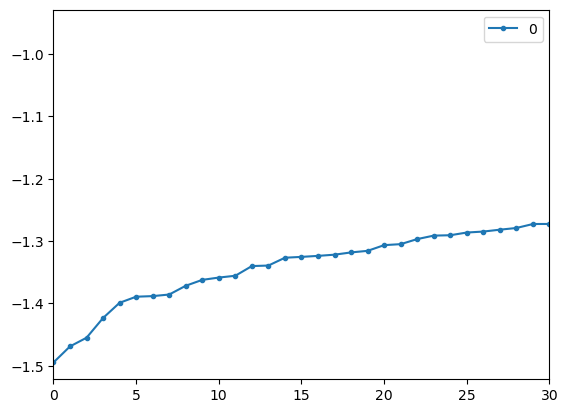

In [33]:
scores = pd.DataFrame(np.sort(df2_scores))
scores.plot(stacked=True, xlim=[0, 30], style='.-')
plt.show()